# Vectorizing

In [3]:
a = [1,2,3]
b = [4,5,6]

a .* b

3-element Vector{Int64}:
  4
 10
 18

In [2]:
a * b

LoadError: MethodError: no method matching *(::Vector{Int64}, ::Vector{Int64})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  *([91m::StridedMatrix{T}[39m, ::StridedVector{S}) where {T<:Union{Float32, Float64, ComplexF32, ComplexF64}, S<:Real} at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/matmul.jl:49
[0m  *(::StridedVecOrMat, [91m::LinearAlgebra.Adjoint{<:Any, <:LinearAlgebra.LQPackedQ}[39m) at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/lq.jl:269
[0m  ...

Dimensions should match:

In [4]:
[1, 2, 3] .* [6, 5]

LoadError: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 3 and 2

However, one element collections will be broadcast in obvious way

In [5]:
[1, 2, 3] .* [5]

3-element Vector{Int64}:
  5
 10
 15

In [6]:
[1, 2, 3] .* 5

3-element Vector{Int64}:
  5
 10
 15

In [7]:
[1,2,3] * [1 2 3]

3×3 Matrix{Int64}:
 1  2  3
 2  4  6
 3  6  9

In [8]:
typeof([1 2 3])

Matrix{Int64} (alias for Array{Int64, 2})

But:

In [5]:
[1 2 3] * [1,2,3]

1-element Vector{Int64}:
 14

In [10]:
1 => 2

1 => 2

In [9]:
[1, 2, 3] .=> [0, 4, 1]

3-element Vector{Pair{Int64, Int64}}:
 1 => 0
 2 => 4
 3 => 1

In [7]:
?2 => 4

```
Pair(x, y)
x => y
```

Construct a `Pair` object with type `Pair{typeof(x), typeof(y)}`. The elements are stored in the fields `first` and `second`. They can also be accessed via iteration (but a `Pair` is treated as a single "scalar" for broadcasting operations).

See also [`Dict`](@ref).

# Examples

```jldoctest
julia> p = "foo" => 7
"foo" => 7

julia> typeof(p)
Pair{String, Int64}

julia> p.first
"foo"

julia> for x in p
           println(x)
       end
foo
7
```


In [11]:
[1, 2, 3] .>= [0, 4, 1]

3-element BitVector:
 1
 0
 1

In [14]:
1 >= 0

true

In [15]:
1 in [1,2,3]

true

In [16]:
12 in [1,2,3]

false

In [17]:
in(1, [1,2,3])

true

> you can add a dot (.) before any operator to broadcast it. What about functions that are not operators? Here you also use a dot (.), but this time, you suffix it after the function name.

In [19]:
abs.([1, -2, 3, -6, -14])

5-element Vector{Int64}:
  1
  2
  3
  6
 14

In [20]:
?Ref(1)

```
Ref{T}
```

An object that safely references data of type `T`. This type is guaranteed to point to valid, Julia-allocated memory of the correct type. The underlying data is protected from freeing by the garbage collector as long as the `Ref` itself is referenced.

In Julia, `Ref` objects are dereferenced (loaded or stored) with `[]`.

Creation of a `Ref` to a value `x` of type `T` is usually written `Ref(x)`. Additionally, for creating interior pointers to containers (such as Array or Ptr), it can be written `Ref(a, i)` for creating a reference to the `i`-th element of `a`.

`Ref{T}()` creates a reference to a value of type `T` without initialization. For a bitstype `T`, the value will be whatever currently resides in the memory allocated. For a non-bitstype `T`, the reference will be undefined and attempting to dereference it will result in an error, "UndefRefError: access to undefined reference".

To check if a `Ref` is an undefined reference, use [`isassigned(ref::RefValue)`](@ref). For example, `isassigned(Ref{T}())` is `false` if `T` is not a bitstype. If `T` is a bitstype, `isassigned(Ref{T}())` will always be true.

When passed as a `ccall` argument (either as a `Ptr` or `Ref` type), a `Ref` object will be converted to a native pointer to the data it references. For most `T`, or when converted to a `Ptr{Cvoid}`, this is a pointer to the object data. When `T` is an `isbits` type, this value may be safely mutated, otherwise mutation is strictly undefined behavior.

As a special case, setting `T = Any` will instead cause the creation of a pointer to the reference itself when converted to a `Ptr{Any}` (a `jl_value_t const* const*` if T is immutable, else a `jl_value_t *const *`). When converted to a `Ptr{Cvoid}`, it will still return a pointer to the data region as for any other `T`.

A `C_NULL` instance of `Ptr` can be passed to a `ccall` `Ref` argument to initialize it.

# Use in broadcasting

`Ref` is sometimes used in broadcasting in order to treat the referenced values as a scalar.

# Examples

```jldoctest
julia> Ref(5)
Base.RefValue{Int64}(5)

julia> isa.(Ref([1,2,3]), [Array, Dict, Int]) # Treat reference values as scalar during broadcasting
3-element BitVector:
 1
 0
 0

julia> Ref{Function}()  # Undefined reference to a non-bitstype, Function
Base.RefValue{Function}(#undef)

julia> try
           Ref{Function}()[] # Dereferencing an undefined reference will result in an error
       catch e
           println(e)
       end
UndefRefError()

julia> Ref{Int64}()[]; # A reference to a bitstype refers to an undetermined value if not given

julia> isassigned(Ref{Int64}()) # A reference to a bitstype is always assigned
true

julia> Ref{Int64}(0)[] == 0 # Explicitly give a value for a bitstype reference
true
```


In [23]:
1 in 1

true

In [29]:
in.([1, 3, 5, 7, 9, 11], [1, 2, 3, 4, 5])

LoadError: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 6 and 5

In [24]:
in.([1, 3, 5, 7, 9, 11], Ref([1, 2, 3, 4, 5]))

6-element BitVector:
 1
 1
 1
 0
 0
 0

In [26]:
1 in [1,2,3]

true

In [27]:
?in

search: in inv In Int Inf Int8 invoke Int64 Int32 Int16 invmod Inf64 Inf32 Inf16



```
in(collection)
∈(collection)
```

Create a function that checks whether its argument is [`in`](@ref) `collection`, i.e. a function equivalent to `y -> y in collection`. See also [`insorted`](@ref) for use with sorted collections.

The returned function is of type `Base.Fix2{typeof(in)}`, which can be used to implement specialized methods.

---

```
in(item, collection) -> Bool
∈(item, collection) -> Bool
```

Determine whether an item is in the given collection, in the sense that it is [`==`](@ref) to one of the values generated by iterating over the collection. Returns a `Bool` value, except if `item` is [`missing`](@ref) or `collection` contains `missing` but not `item`, in which case `missing` is returned ([three-valued logic](https://en.wikipedia.org/wiki/Three-valued_logic), matching the behavior of [`any`](@ref) and [`==`](@ref)).

Some collections follow a slightly different definition. For example, [`Set`](@ref)s check whether the item [`isequal`](@ref) to one of the elements. [`Dict`](@ref)s look for `key=>value` pairs, and the key is compared using [`isequal`](@ref). To test for the presence of a key in a dictionary, use [`haskey`](@ref) or `k in keys(dict)`. For these collections, the result is always a `Bool` and never `missing`.

To determine whether an item is not in a given collection, see [`:∉`](@ref). You may also negate the `in` by doing `!(a in b)` which is logically similar to "not in".

When broadcasting with `in.(items, collection)` or `items .∈ collection`, both `item` and `collection` are broadcasted over, which is often not what is intended. For example, if both arguments are vectors (and the dimensions match), the result is a vector indicating whether each value in collection `items` is `in` the value at the corresponding position in `collection`. To get a vector indicating whether each value in `items` is in `collection`, wrap `collection` in a tuple or a `Ref` like this: `in.(items, Ref(collection))` or `items .∈ Ref(collection)`.

# Examples

```jldoctest
julia> a = 1:3:20
1:3:19

julia> 4 in a
true

julia> 5 in a
false

julia> missing in [1, 2]
missing

julia> 1 in [2, missing]
missing

julia> 1 in [1, missing]
true

julia> missing in Set([1, 2])
false

julia> !(21 in a)
true

julia> !(19 in a)
false

julia> [1, 2] .∈ [2, 3]
2-element BitVector:
 0
 0

julia> [1, 2] .∈ ([2, 3],)
2-element BitVector:
 0
 1
```

See also: [`insorted`](@ref), [`contains`](@ref), [`occursin`](@ref), [`issubset`](@ref).


In [30]:
size(Ref([1,2,3,4,5]))

()

In [28]:
size([[1, 2, 3, 4, 5]])

(1,)

In [25]:
in.([1, 3, 5, 7, 9, 11], [[1, 2, 3, 4, 5]])

6-element BitVector:
 1
 1
 1
 0
 0
 0

In [31]:
aq = [10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
                      8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
                     13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
                      9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
                     11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
                     14.0   9.96  14.0  8.1   14.0   8.84   8.0   7.04
                      6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
                      4.0   4.26   4.0  3.1    4.0   5.39  19.0  12.50
                     12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
                      7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
                      5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89]

11×8 Matrix{Float64}:
 10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
  8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
 13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
  9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
 11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
 14.0   9.96  14.0  8.1   14.0   8.84   8.0   7.04
  6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
  4.0   4.26   4.0  3.1    4.0   5.39  19.0  12.5
 12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
  7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
  5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

In [32]:
using Statistics

In [33]:
mean.(eachcol(aq))

8-element Vector{Float64}:
 9.0
 7.500909090909093
 9.0
 7.500909090909091
 9.0
 7.500000000000001
 9.0
 7.50090909090909

In [34]:
# function R2(x, y)
# X = [ones(11) x]
#     model = X \ y
#     prediction = X * model
#     error = y - prediction
#     SS_res = sum(v -> v ^ 2, error)
#     mean_y = mean(y)
#     SS_tot = sum(v -> (v - mean_y) ^ 2, y)
#     return 1 - SS_res / SS_tot
# end

# becomes:

function R2(x, y)
    X = [ones(11) x]
    model = X \ y
    prediction = X * model
    SS_res = sum((y .- prediction) .^ 2)
    SS_tot = sum((y .- mean(y)) .^ 2)
    return 1 - SS_res / SS_tot
end

R2 (generic function with 1 method)

# Parametric Types

> Most collection types in Julia are parametric


In [35]:
[]

Any[]

In [36]:
Dict()

Dict{Any, Any}()

In [37]:
Set()

Set{Any}()

Types are *invariant* in parameters

https://docs.julialang.org/en/v1/manual/types/#man-parametric-composite-types

In [39]:
typeof([1, 2, 5])

Vector{Int64} (alias for Array{Int64, 1})

In [38]:
[1, 2, 5] isa AbstractVector{Real}

false

In [40]:
?<:

search: <:



```
<:(T1, T2)
```

Subtype operator: returns `true` if and only if all values of type `T1` are also of type `T2`.

# Examples

```jldoctest
julia> Float64 <: AbstractFloat
true

julia> Vector{Int} <: AbstractArray
true

julia> Matrix{Float64} <: Matrix{AbstractFloat}
false
```


In [41]:
[1, 2, 5] isa AbstractVector{<:Real}

true

In [25]:
typeof([1, 2, 5])

Vector{Int64} (alias for Array{Int64, 1})

In [44]:
function ourCov(x::AbstractVector{<:Real}, y::AbstractVector{<:Real}) 
    len = length(x)
    @assert len == length(y) > 0
    sum((x .- mean(x)) .* (y .- mean(y))) / (len - 1)
end

ourCov (generic function with 1 method)

In [34]:
ourCov(aq[1,:], aq[2,:])

0.9743642857142859

In [42]:
a = [1,2]
b = [0.2, 0.4]

typeof(a), typeof(b)

(Vector{Int64}, Vector{Float64})

In [45]:
ourCov(a,b)

0.1

# Python

In [46]:
using Random

In [47]:
Random.seed!(9123123)

TaskLocalRNG()

In [48]:
cluster1 = randn(100, 5) .- 1

100×5 Matrix{Float64}:
 -1.47267    -0.793283   -1.78457   -0.683267    -2.30552
 -2.57908    -1.01747    -1.17309   -0.635685    -0.889063
  0.942477   -0.362311    0.493396  -0.812999    -0.276004
 -0.66483    -1.4533     -0.733364  -1.81203     -0.393998
 -0.824515   -2.02515    -0.146024  -1.5159       0.315533
 -0.92702    -1.2316     -1.49249    1.86384     -1.37639
 -0.806021   -0.716135   -1.13584   -0.522863    -0.0639138
 -0.955297   -0.856104   -0.910632  -1.13668     -2.12043
 -1.60907    -0.486445    0.625125  -1.06804     -0.869047
 -0.286469   -0.0807028  -1.35567   -1.2396      -2.01966
 -0.631138   -1.05612    -0.835645  -2.99346     -0.179164
 -1.75635    -2.63681    -0.433571  -1.09213     -1.11263
 -0.159331   -0.825695   -1.67013   -1.73587     -0.869486
  ⋮                                              
 -0.729993    0.685178   -1.44683   -0.00372829  -1.47596
 -2.09973    -1.75806     0.754422  -0.2753      -0.575976
 -1.47274    -1.91463     0.495853  -1.5281    

In [49]:
cluster2 = randn(100, 5) .+ 1

100×5 Matrix{Float64}:
 -0.36162    -0.237928    0.484085    0.408598   -0.315224
  0.7322     -0.215183    1.43343     0.84689     1.2395
 -0.128995    1.46246     1.41501    -0.180305   -1.68105
  1.55615    -0.630465   -0.633982    2.33023    -0.0679828
  1.61668     1.18656     0.285204    1.4821      2.73014
  0.944363   -1.01118     3.31875     2.44574     0.829173
 -0.544      -0.265796    0.856832    1.78602     2.07184
 -0.614357    0.0723445   0.13003     1.76026     2.4426
  0.965588    0.879064    1.91795     2.64547     0.175552
  0.488947    1.24174     0.35415     0.645349   -0.274953
  0.964437    1.34304     0.477419    0.793662    0.922343
 -0.276881    1.84035     2.00188    -0.700669    1.67532
 -1.42584     1.70198     2.276      -0.42003     0.569038
  ⋮                                              
 -2.46076    -1.02887     1.04436     1.6434      1.73181
  0.677942    0.793417    0.427743    0.511428    1.13177
  1.03823    -0.853539    0.256478   -0.385559    0

In [50]:
import Pkg; Pkg.add("PyCall")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [51]:
using PyCall

In [52]:
import Pkg; Pkg.add("Conda")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [53]:
using Conda
Conda.add("scikit-learn")

[ Info: Running `conda install -y scikit-learn` in root environment


Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.



In [54]:
manifold = pyimport("sklearn.manifold")

PyObject <module 'sklearn.manifold' from '/Users/james/.julia/conda/3/lib/python3.10/site-packages/sklearn/manifold/__init__.py'>

Using Python ...

In [55]:
tsne = manifold.TSNE(n_components=2, init="random",
                            learning_rate="auto", random_state=1234)

PyObject TSNE(init='random', random_state=1234)

In [56]:
data5 = vcat(cluster1, cluster2)

200×5 Matrix{Float64}:
 -1.47267    -0.793283   -1.78457    -0.683267   -2.30552
 -2.57908    -1.01747    -1.17309    -0.635685   -0.889063
  0.942477   -0.362311    0.493396   -0.812999   -0.276004
 -0.66483    -1.4533     -0.733364   -1.81203    -0.393998
 -0.824515   -2.02515    -0.146024   -1.5159      0.315533
 -0.92702    -1.2316     -1.49249     1.86384    -1.37639
 -0.806021   -0.716135   -1.13584    -0.522863   -0.0639138
 -0.955297   -0.856104   -0.910632   -1.13668    -2.12043
 -1.60907    -0.486445    0.625125   -1.06804    -0.869047
 -0.286469   -0.0807028  -1.35567    -1.2396     -2.01966
 -0.631138   -1.05612    -0.835645   -2.99346    -0.179164
 -1.75635    -2.63681    -0.433571   -1.09213    -1.11263
 -0.159331   -0.825695   -1.67013    -1.73587    -0.869486
  ⋮                                              
 -2.46076    -1.02887     1.04436     1.6434      1.73181
  0.677942    0.793417    0.427743    0.511428    1.13177
  1.03823    -0.853539    0.256478   -0.385559  

In [57]:
data2 = tsne.fit_transform(data5)

200×2 Matrix{Float32}:
  -3.31006    11.9431
 -10.2599     10.4024
   1.41287     0.228867
  -7.64581     5.74457
  -7.31292     6.65021
  -0.210355    6.89848
  -5.01369     5.29785
  -3.51495    10.5233
  -5.57201     2.49366
  -1.72207    10.3352
  -8.75799     4.24341
  -7.59115     9.11865
  -3.90973     6.66736
   ⋮         
  -1.25457   -10.7798
   4.20296    -8.17286
   1.21825     0.309574
   4.82747    -5.09281
   6.35946   -10.4653
   7.30571   -11.6677
   7.20131    -2.73696
   2.7489     -8.29167
   9.81758    -2.858
   6.71072    -3.15266
   2.00217   -10.3913
   5.52674    -6.374

Back to Julia ...

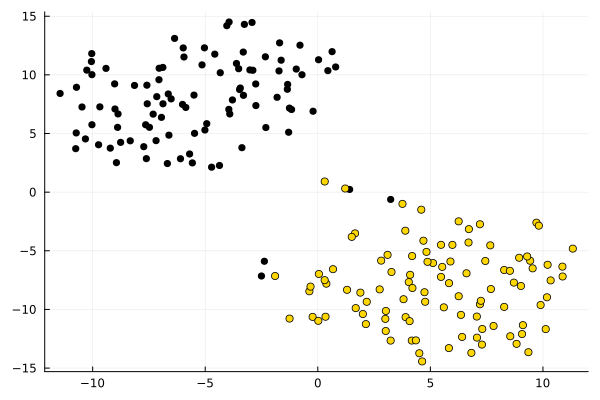

In [58]:
using Plots

scatter(data2[:, 1], data2[:, 2];
               color=[fill("black", 100); fill("gold", 100)],
               legend=false)


> Julia provides four important ways to iterate over collections and transform them: loops, the map function (and other similar higher-order functions), comprehen- sions, and broadcasting. Each has slightly different rules of processing data. Therefore, you should choose one depending on your needs in a given situation.

> Most functions in Julia are defined to work on scalars. If you want to apply a function to a collection elementwise, you have to use one of the methods pro- vided by Julia that allow you to iterate over collections.

>Broadcasting in Julia is a way to apply a function to a collection of values (an operation often called vectorization in other languages). You can broadcast any function (like sin or log) by suffixing it with a dot (.). Similarly, to vectorize an operator (like * or /), prefix it with a dot (.).

> Broadcasting in Julia is efficient, as it uses broadcast fusion. Julia does not need to allocate objects for storing intermediate results of processing data when exe- cuting complex broadcasted operations.

> If you have a broadcasted operation to which you pass a collection that you want to be treated as a scalar, wrap it in Ref. This approach is often used when per- forming a lookup into a reference table using the in function.